<a href="https://colab.research.google.com/github/jboyd170/face-recognition/blob/main/Face_Recognition_using_face_recognition_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

Adapted from youtube video: https://youtu.be/987QtKPZ-P0, 

author: adarsh1021 

Original colab: https://colab.research.google.com/drive/15_yQKwhVsmfN2p7geco_VFGKLYqBah04?usp=sharing

Adapted to better show program flow for an instructional lab.



## Install Libraries

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=205eb79142099e4d9c9e1499e5464347367dff7e5f30eb0c5954294c263091dd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from datetime import datetime

## Clone directories and set working directory


In [ ]:
!git clone https://github.com/jboyd170/face-recognition.git
%cd face-recognition/

Cloning into 'face-recognition'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 91 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/face-recognition


## Function to read image from file and return sized image

## Function to read and resize images

In [ ]:
def read_img(path):
    img = cv2.imread(path)
    #print("Path: ",path)
    (h, w) = img.shape[:2]
    #print("h and w: ", h, w)
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    #print("width and height: ", width, height)
    return cv2.resize(img, (width, height))

## Set the folders to use for 'known' and 'unknown' images

In [ ]:
known_dir = 'known'
unknown_dir = 'unknown'

## Read images from 'known' images directory and create face encoding

kobe.jpg


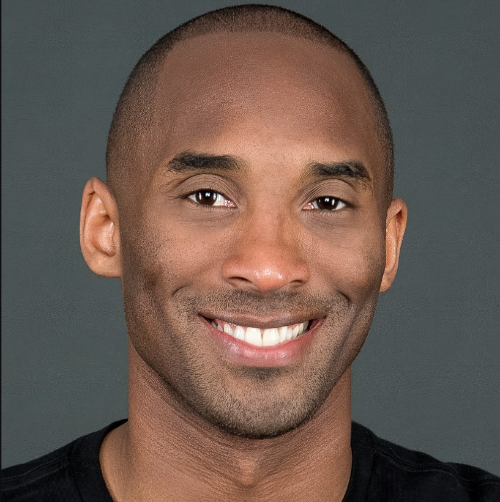

bill.jpg


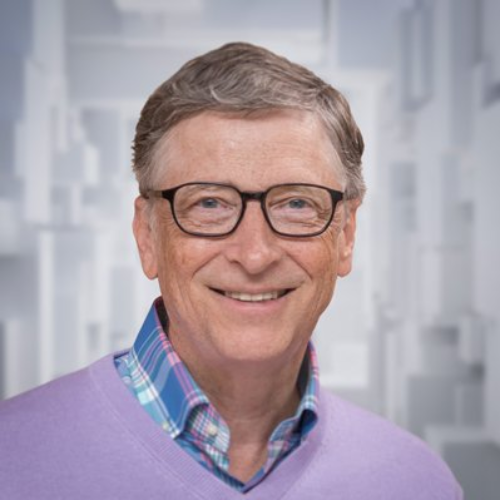

elon.jpg


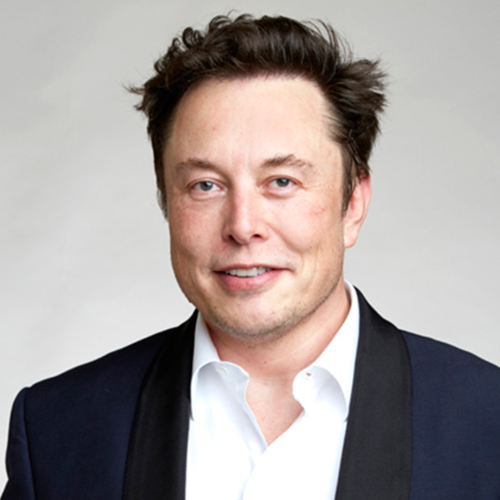

freddie.jpg


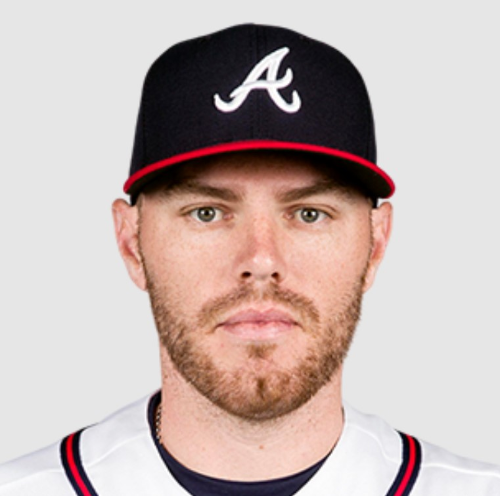

In [ ]:
known_encodings = []
known_names = []

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]  # create encoding of 'known' images
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])
    print(file)
    cv2_imshow(img)
#print(known_names, known_encodings)

## Check for bad files and remove if necessary


In [ ]:
print(os.listdir(unknown_dir))

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']


In [ ]:
%rmdir /content/face-recognition/unknown/.ipynb_checkpoints

## Run it all together 

Encode known images, compare to unknown images and print out images with identification

removing bad file
rmdir: failed to remove '/content/face-recognition/unknown/.ipynb_checkpoints': No such file or directory
['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing 7.jpg
Results:  [0.83632019 0.80011394 0.8794438  0.83046061]
File: 7.jpg is unknown


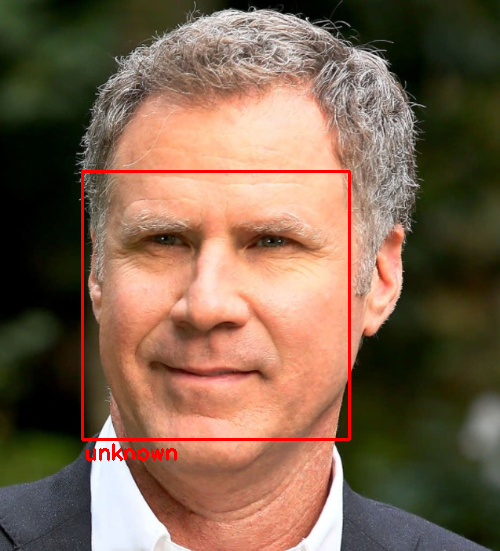

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing 10.jpg
Results:  [0.86974779 0.9116802  0.79180511 0.36510108]


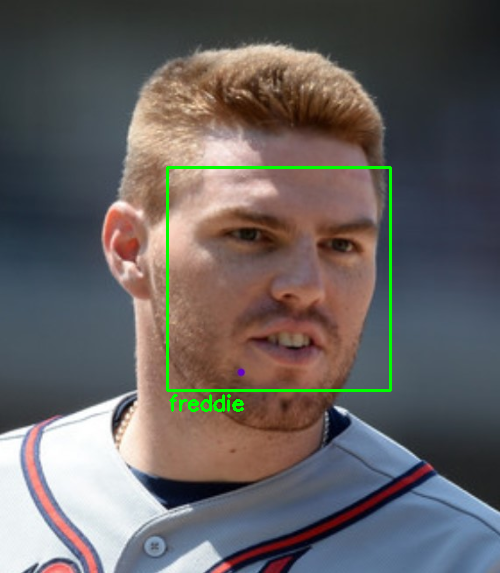

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing 2.jpg
Results:  [0.85724435 0.44524176 0.80242395 0.84714649]


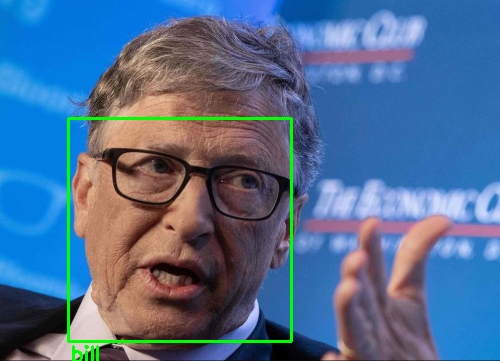

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing 8.jpg
Results:  [0.41036492 0.87236682 0.85397204 0.85082772]


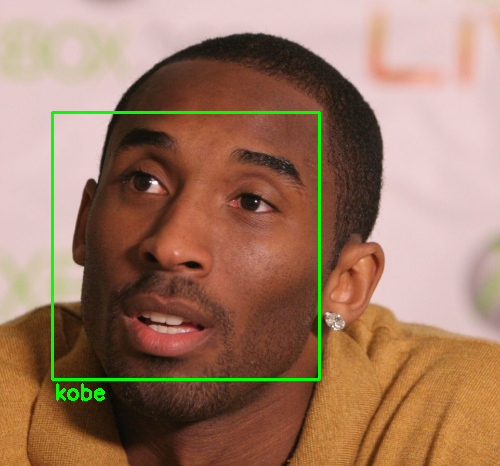

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing headshot2.jpg
Results:  [0.97499542 0.86283217 0.91566017 0.94140863]
File: headshot2.jpg is unknown


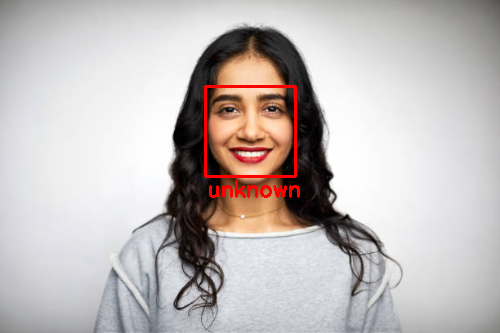

['7.jpg', '10.jpg', '2.jpg', '8.jpg', 'headshot2.jpg', '1.jpg']
6
Processing 1.jpg
Results:  [0.84362358 0.6920464  0.49094296 0.75339979]


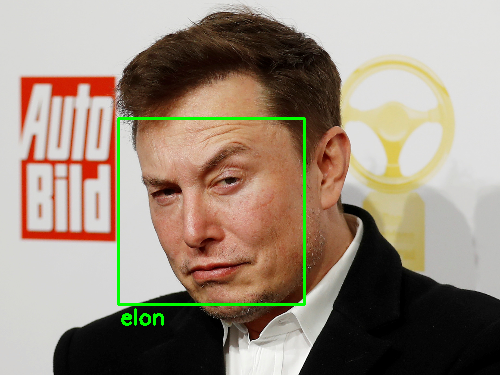

In [ ]:
known_encodings = []
known_names = []

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

error_flag = 0
for file in os.listdir(unknown_dir):
    img = read_img(unknown_dir + '/' + file)
    if file[-4] ==".":
      error_flag = 1
if error_flag == 1:
  print("removing bad file")
  %rmdir /content/face-recognition/unknown/.ipynb_checkpoints

for file in os.listdir(unknown_dir):
    print(os.listdir(unknown_dir))
    print(len(os.listdir(unknown_dir)))
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    print("Results: ", face_recognition.face_distance(known_encodings, img_enc))
    name = "unknown"
    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2_imshow(img)
    if name == "unknown":
        print("File: " + file + " is unknown")
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, "unknown", (left+2, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2_imshow(img)
            




## Add own images